<a href="https://colab.research.google.com/github/kaifkh20/d2l/blob/main/d2l_aich2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l


In [5]:
num_tosses = 100
# what does this line do is it generates 100 sample space if the random number is greater than 0.5 it's head and if less that it tails.
# sum of all the true
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])


heads, tails:  [55, 45]


In [6]:
# 0th index for heads and 1st index for tails
# multinomial func generates 100 sample for each 1/2 prob
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()
# this generates the frequency of heads and tails
Multinomial(100, fair_probs).sample()/100
# for less number of sample space there gets a differenece
# but if we do it in large quantity it actually converges
Multinomial(100000, fair_probs).sample()/100000

tensor([0.5012, 0.4988])

There is a phenomenon called law of large numbers and central limit theorem.
Which states that as the sample size grows by n the error rate goes down by 1/root(n)

In [7]:
# gives only one try gives answers as either 0 or 1 generate 10000 sample creating a 10000 dim vector
counts = Multinomial(1, fair_probs).sample((10000,))
# sum by row
cum_counts = counts.cumsum(dim=0)
# this basically generates the prob of getting either of them upto that point
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
# converts into numpy array
estimates = estimates.numpy()
estimates

array([[1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.6666667 , 0.33333334],
       ...,
       [0.49909982, 0.5009002 ],
       [0.4990499 , 0.5009501 ],
       [0.499     , 0.501     ]], dtype=float32)

In [17]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 878.3 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uni

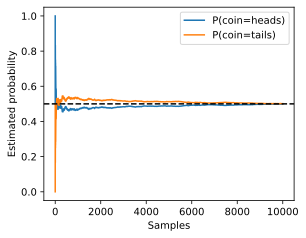

In [8]:
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();